## Data for AAPL stock using Alpha Vantage API

In [2]:
import requests

#API_KEY = '6JUN76V0J64TYTF5'
#STOCK SYMBOL = AAPL
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&outputsize=full&apikey=6JUN76V0J64TYTF5'  # my API KEY and stock symbol
r = requests.get(url)
data = r.json()

In [3]:
import csv

# Αποθήκευσ του "Time Series (Daily)" 
time_series = data.get("Time Series (Daily)", {})

# Προετοιμασία των δεδομένων για αποθήκευση σε CSV
csv_data = [("Date", "Close Price")]  

# αποθήκευση των ημερομηνιών και ταξινόμηση τουσ απο την πιο πρόσφατη στην παλαιότερη 
dates = list(time_series.keys())
dates.sort(reverse=True) 

# για κάθε ημερομηνία παίρνουμε την τιμή κλεισίματοσ και τα αποθηκεύουμε στο csv_data
for i, date in enumerate(dates):
    close_price = time_series[date].get("4. close", None)
    if close_price:
        csv_data.append((date, close_price))

# γράφουμε τα δεδομένα στο CSV αρχείο 
csv_file = 'close_prices.csv'
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(csv_data)

print(f"Data saved to {csv_file}")


Data saved to close_prices.csv


## Linear Regression

In [4]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Διάβασμα δεδομένων 
data = pd.read_csv('close_prices.csv')

In [5]:
data.head()

,Date,Close Price
0,12-11-24,224.23
1,11-11-24,224.23
2,08-11-24,226.96
3,07-11-24,227.48
4,06-11-24,222.72


In [6]:
print(data.describe())

       Close Price
count  6299.000000
mean    174.377907
std     146.898824
min      13.120000
25%      78.960000
50%     139.350000
75%     203.375000
max     702.100000


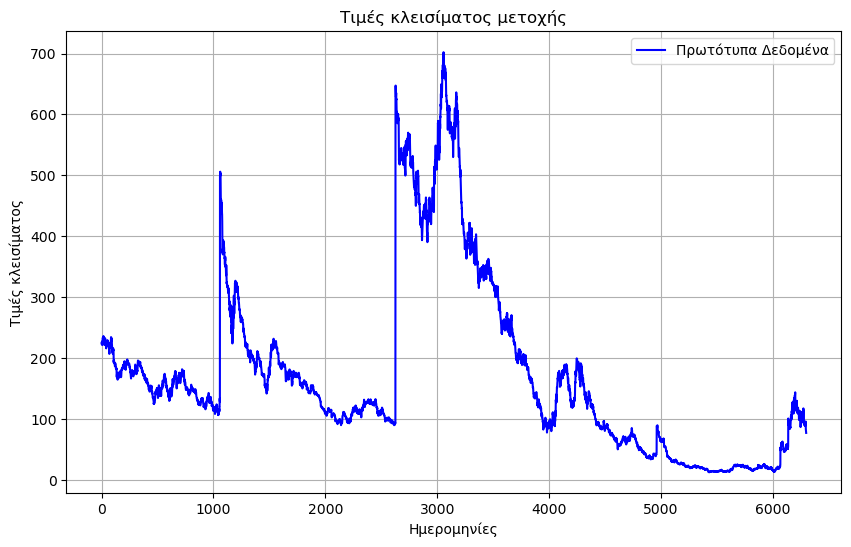

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Close Price"], label='Πρωτότυπα Δεδομένα', color='b')
plt.title('Τιμές κλεισίματος μετοχής')
plt.xlabel('Ημερομηνίες')
plt.ylabel('Τιμές κλεισίματος')
plt.legend()
plt.grid(True)

plt.show()

In [9]:
from scipy.ndimage import gaussian_filter1d

# εφαρμογή Gaussian smoothing στις τιμές κλεισίματος
smoothed_data = gaussian_filter1d(data["Close Price"], sigma=5)

In [10]:
# δημιουργία στήλης με τις Smoothed τιμές
data["Smoothed Close Price"] = smoothed_data

print(data.head())

       Date  Close Price  Smoothed Close Price
0  12-11-24       224.23            225.188819
1  11-11-24       224.23            225.257761
2  08-11-24       226.96            225.399496
3  07-11-24       227.48            225.620585
4  06-11-24       222.72            225.927674


In [11]:
data.to_csv("Smoothed_Close_Prices.csv", index=False)

C:\Users\evage\AppData\Local\Temp\ipykernel_23932\135593562.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] =  pd.to_datetime(data['Date'])


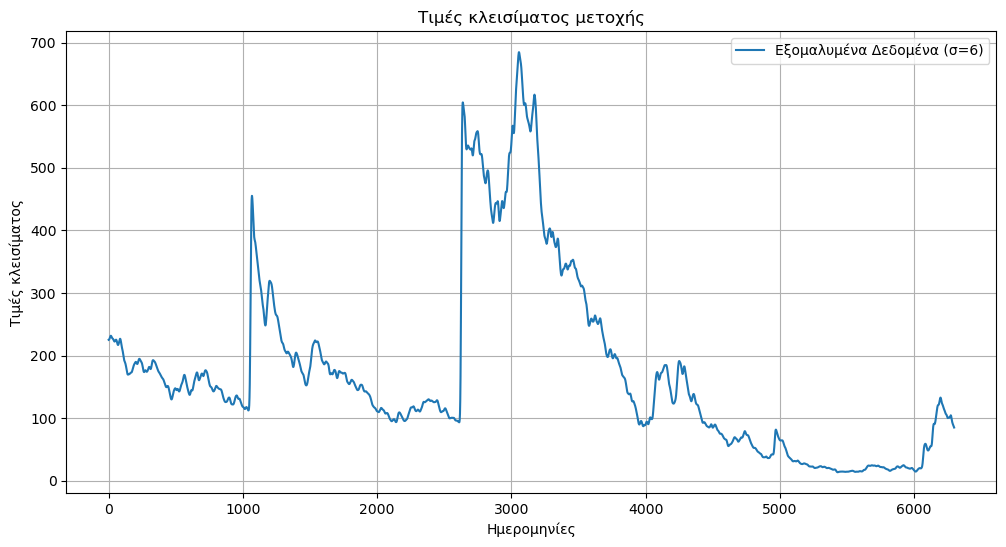

In [12]:
data['Date'] =  pd.to_datetime(data['Date'])

# Δημιουργία γραφήματος
plt.figure(figsize=(12, 6))

# Εξομαλυμένα δεδομένα
plt.plot(data.index, smoothed_data, label='Εξομαλυμένα Δεδομένα (σ=6)')

# Adding titles and labels
plt.title('Τιμές κλεισίματος μετοχής')
plt.xlabel('Ημερομηνίες')
plt.ylabel('Τιμές κλεισίματος')
plt.legend()
plt.grid(True)

plt.show()

In [13]:
import numpy as np

# Υπολογισμός του εύρους
range_of_data = 702.100000 - 13.120000

print("Το εύρος των δεδομένων είναι:", range_of_data)

Το εύρος των δεδομένων είναι: 688.98


In [14]:
import pandas as pd

# Επιλογή της στήλης 'Close Price' 
prices = data['Close Price']

std_close = prices.std()   # Τυπική απόκλιση
variance = prices.var() #διακύμανση

print("Η διακύμανση είναι:", variance)
print("Η τυπική απόκλιση είναι:", std_close)

Η διακύμανση είναι: 21579.26455016013
Η τυπική απόκλιση είναι: 146.89882419597555


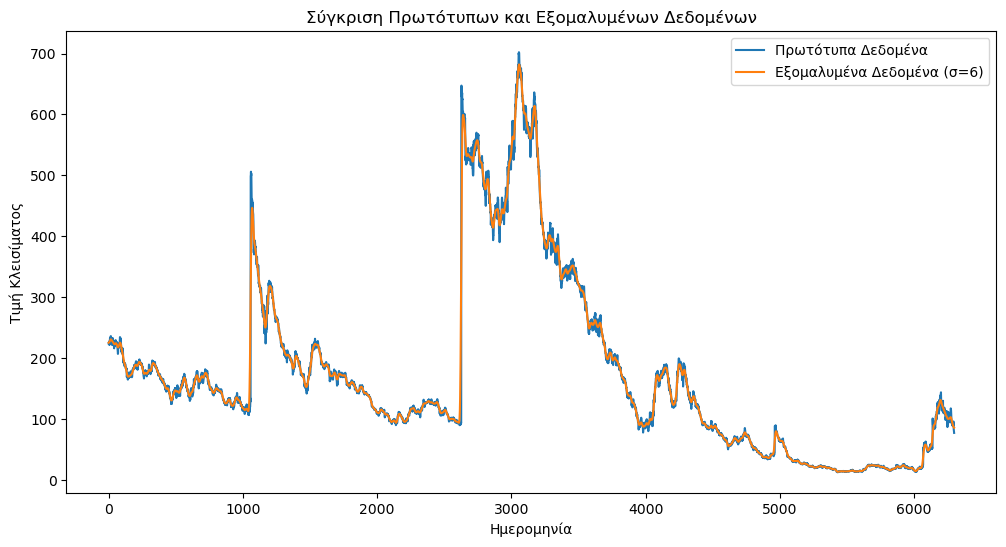

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Εφαρμογή του Gaussian φίλτρου
smoothed_data = gaussian_filter1d(data["Close Price"], sigma=6)

# Δημιουργία γραφήματος
plt.figure(figsize=(12, 6))

# Πρωτότυπα δεδομένα
plt.plot(data.index, data["Close Price"], label='Πρωτότυπα Δεδομένα')

# Εξομαλυμένα δεδομένα
plt.plot(data.index, smoothed_data, label='Εξομαλυμένα Δεδομένα (σ=6)')

# Προσθήκη τίτλου και λεζάντας
plt.title('Σύγκριση Πρωτότυπων και Εξομαλυμένων Δεδομένων')
plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή Κλεισίματος')
plt.legend()

# Εμφάνιση του γραφήματος
plt.show()

C:\Users\evage\AppData\Local\Temp\ipykernel_23932\882291251.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_grouped = data.groupby(pd.Grouper(freq='Y'))


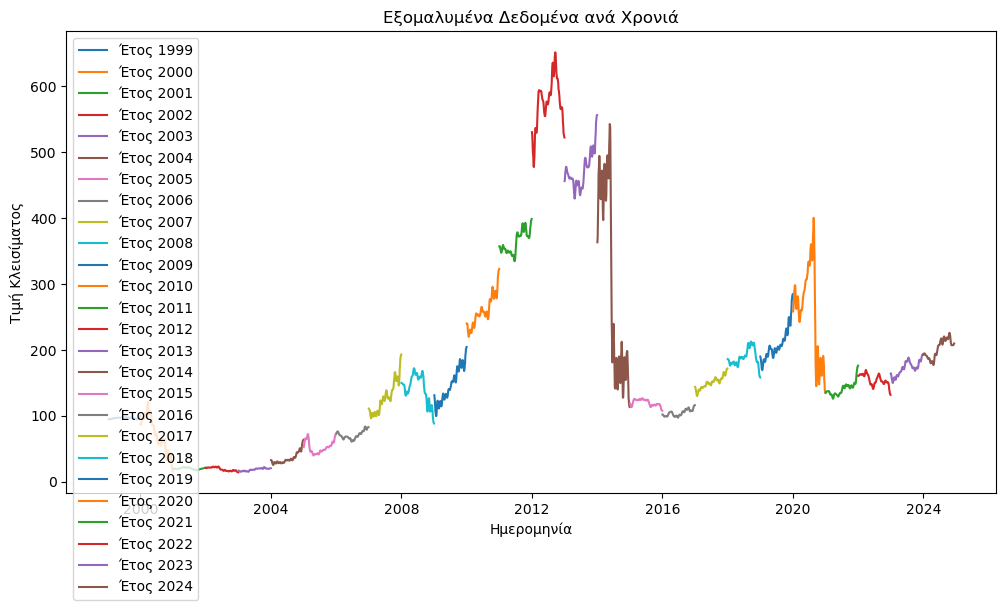

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Ομαδοποίηση των δεδομένων ανά έτος
data.index = pd.to_datetime(data['Date'])  # Μετατροπή της στήλης 'Date' σε datetime
data_grouped = data.groupby(pd.Grouper(freq='Y'))

# Δημιουργία γραφήματος
plt.figure(figsize=(12, 6))

for year, group in data_grouped:
    smoothed_data = gaussian_filter1d(group['Close Price'], sigma=6)
    plt.plot(group.index, smoothed_data, label=f'Έτος {year.year}')

# Προσθήκη τίτλου και λεζάντας
plt.title('Εξομαλυμένα Δεδομένα ανά Χρονιά')
plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή Κλεισίματος')
plt.legend()

# Εμφάνιση του γραφήματος
plt.show()